In [100]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

import scipy as sc
from scipy import stats as sts
from scipy.special import boxcox1p, inv_boxcox1p
from scipy.stats import norm, skew

import pandas_profiling

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
plt.rcParams.update({'font.size': 14})

In [173]:
tr_data = pd.read_csv('train.csv', sep = ',')
ts_data = pd.read_csv('test.csv', sep = ',')

y_tr = tr_data['SalePrice']
train_ID = tr_data.Id.values
test_ID = ts_data.Id.values
print ("Shape before: train = {}, test = {}".format(tr_data.shape,ts_data.shape))
for i in [tr_data, ts_data]:
    i.drop('Id', axis = 1, inplace = True)
#tr_data.drop('SalePrice', axis =1, inplace = True)
print ("Shape after: train = {}, test = {}".format(tr_data.shape,ts_data.shape))


Shape before: train = (1460, 81), test = (1459, 80)
Shape after: train = (1460, 80), test = (1459, 79)


In [174]:
quant = [f for f in tr_data.columns if tr_data.dtypes[f] != 'object']
qual = [f for f in tr_data.columns if tr_data.dtypes[f] == 'object']

In [175]:
quant

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [176]:
quant_to_qual = ['MSSubClass', 'OverallQual', 'OverallCond']
for i in quant_to_qual:
    quant.remove(i)
    qual.append(i)

In [177]:
qual

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond']

In [178]:
tr_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [179]:
ts_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## FILLING MISSING VALUES

#### TRAIN DATA

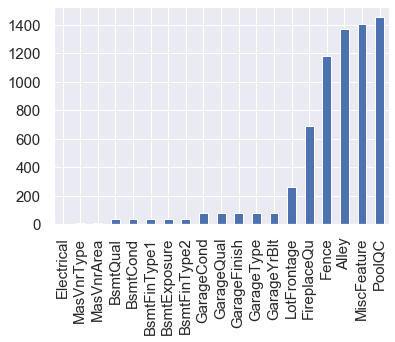

In [180]:
missing = tr_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar(fontsize = 15)

In [181]:
missing.index
missing_qual = [i for i in missing.index if i in qual]
missing_quant = [i for i in missing.index if i in quant]

In [182]:
missing_quant

['MasVnrArea', 'GarageYrBlt', 'LotFrontage']

Filling only quantitative data, because none in qualitative data meens that object is not exist.

In [183]:
for i in tr_data['LotConfig'].unique():    
        tr_data.loc[(tr_data['LotConfig'] == i) & (tr_data['LotFrontage'].isnull()), 'LotFrontage'] = tr_data[tr_data['LotConfig'] == i]['LotFrontage'].mean()


Next features should be filled with 0, as not existed object

In [184]:
tr_data['GarageYrBlt'].fillna(0., inplace = True);
tr_data['MasVnrArea'].fillna(0., inplace = True);



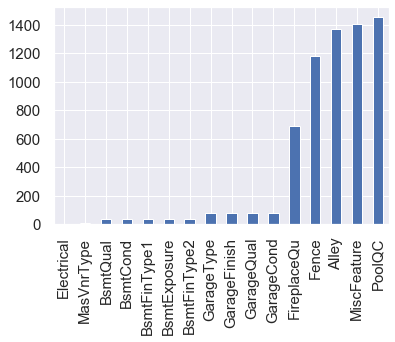

In [185]:
missing = tr_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar(fontsize = 15)

In [186]:
missing.index
missing_qual = [i for i in missing.index if i in qual]
missing_quant = [i for i in missing.index if i in quant]
missing_quant 

[]

#### TEST DATA

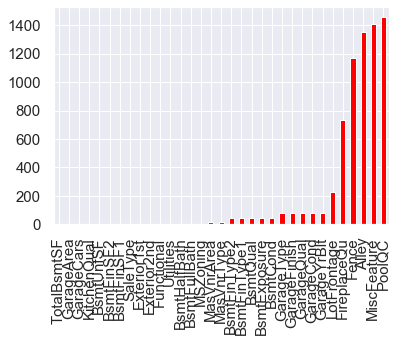

In [187]:
missing = ts_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar(fontsize = 15, color = 'red')

In [188]:
missing.index
missing_qual = [i for i in missing.index if i in qual]
missing_quant = [i for i in missing.index if i in quant]
missing_quant

['TotalBsmtSF',
 'GarageArea',
 'GarageCars',
 'BsmtUnfSF',
 'BsmtFinSF2',
 'BsmtFinSF1',
 'BsmtHalfBath',
 'BsmtFullBath',
 'MasVnrArea',
 'GarageYrBlt',
 'LotFrontage']

In [189]:
for i in ts_data['LotConfig'].unique():    
        ts_data.loc[(ts_data['LotConfig'] == i) & (ts_data['LotFrontage'].isnull()), 'LotFrontage'] = ts_data[ts_data['LotConfig'] == i]['LotFrontage'].mean()


In [190]:
missing = ts_data.isnull().sum()
for i in missing.index:
    ts_data[i].fillna(0., inplace = True)


In [193]:
missing_qual = [i for i in missing.index if i in qual]
missing_quant = [i for i in missing.index if i in quant]
missing_quant
ts_data.isnull().sum().sum()

0

## CHECKING THE TYPE OF SALE PRICE DISTRIBUTION

In [196]:
def plot_distr_type(x, distr, name):

    fig = plt.figure(figsize=(16,10))
    ax = fig.add_subplot(221)
    r2 = sc.stats.probplot(x, dist=distr, sparams=distr.fit(x), plot = ax, fit = True)[1][2]
    plt.title('{}, R2={}'.format(name, round(r2,6)))
    ax2 = fig.add_subplot(222)
    sns.distplot(x, kde = False, fit = distr)
    plt.show()
    return (r2, name)
    

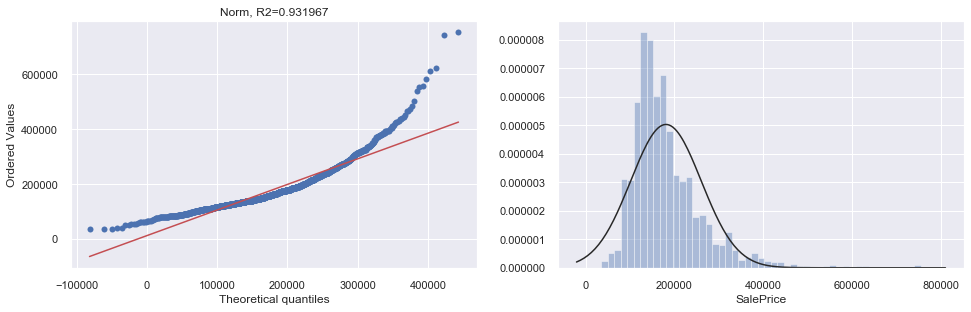

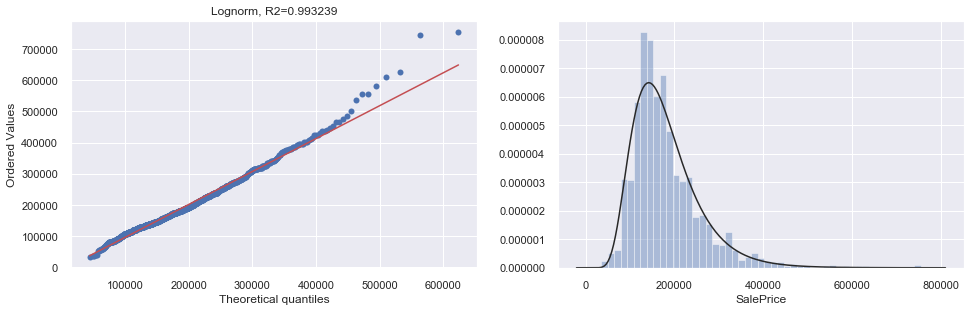

(0.993238951863905, 'Lognorm')

In [197]:
plot_distr_type(y_tr, sts.norm, 'Norm')
plot_distr_type(y_tr, sts.lognorm, 'Lognorm')

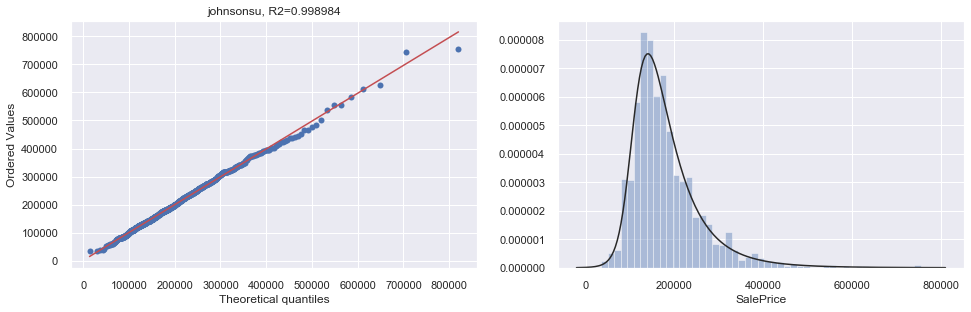

C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2316: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5290: RuntimeWarning: invalid value encountered in multiply
  Px *= trm1+trm2
C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5286: RuntimeWarning: overflow encountered in multiply
  trm1 = np.sqrt(2)*nc*x*sc.hyp1f1(n/2+1, 1.5, valF)


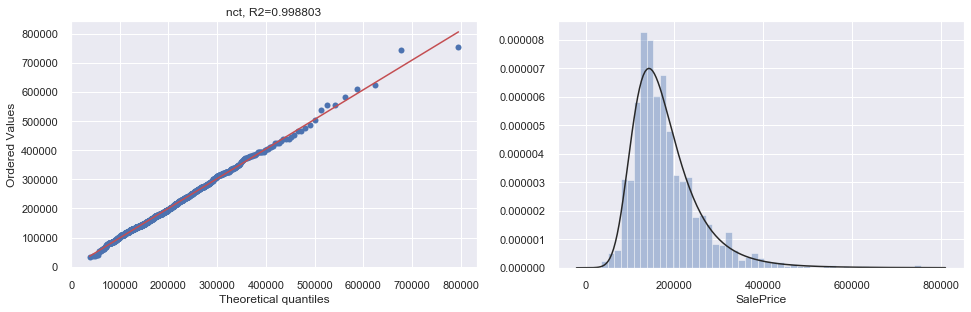

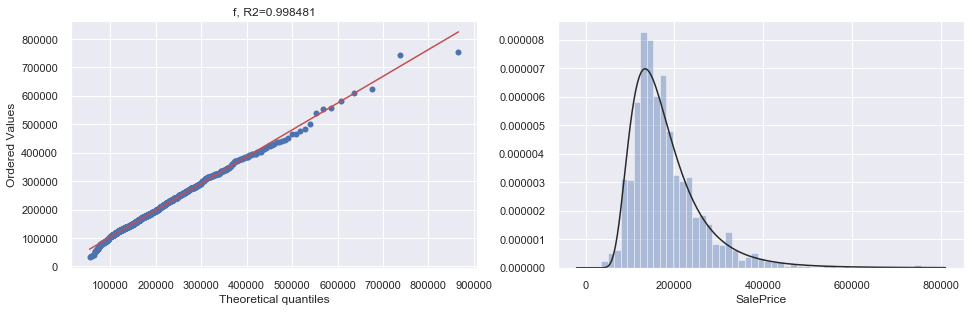

C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:667: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:671: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1035: RuntimeWarning: invalid value encountered in subtract
  mu2 = mu2p - mu * mu


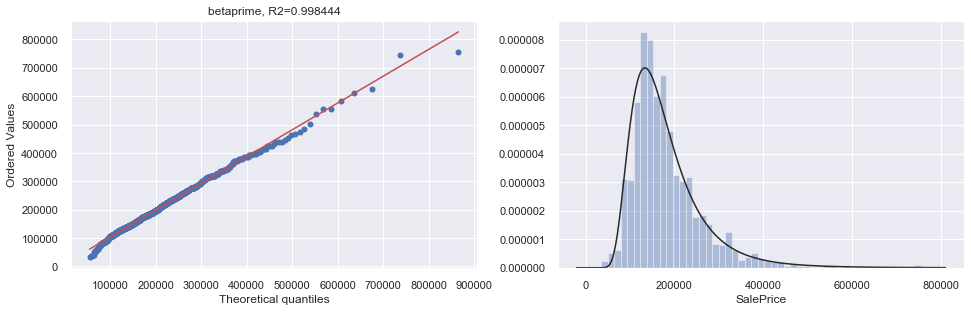

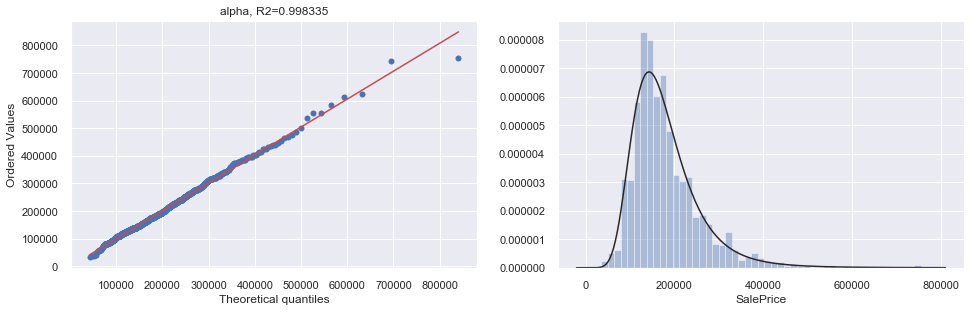

(0.9983350201058715, 'alpha')

In [198]:
plot_distr_type(y_tr, sts.johnsonsu, 'johnsonsu')
plot_distr_type(y_tr, sts.nct, 'nct')
plot_distr_type(y_tr, sts.f, 'f')
plot_distr_type(y_tr, sts.betaprime, 'betaprime')
plot_distr_type(y_tr, sts.alpha, 'alpha')

Distribution of SalePrice is not a normal distribution. Lognorm distribution is more close, but the best fit is Johnsons unbound distribution. 

To transform later

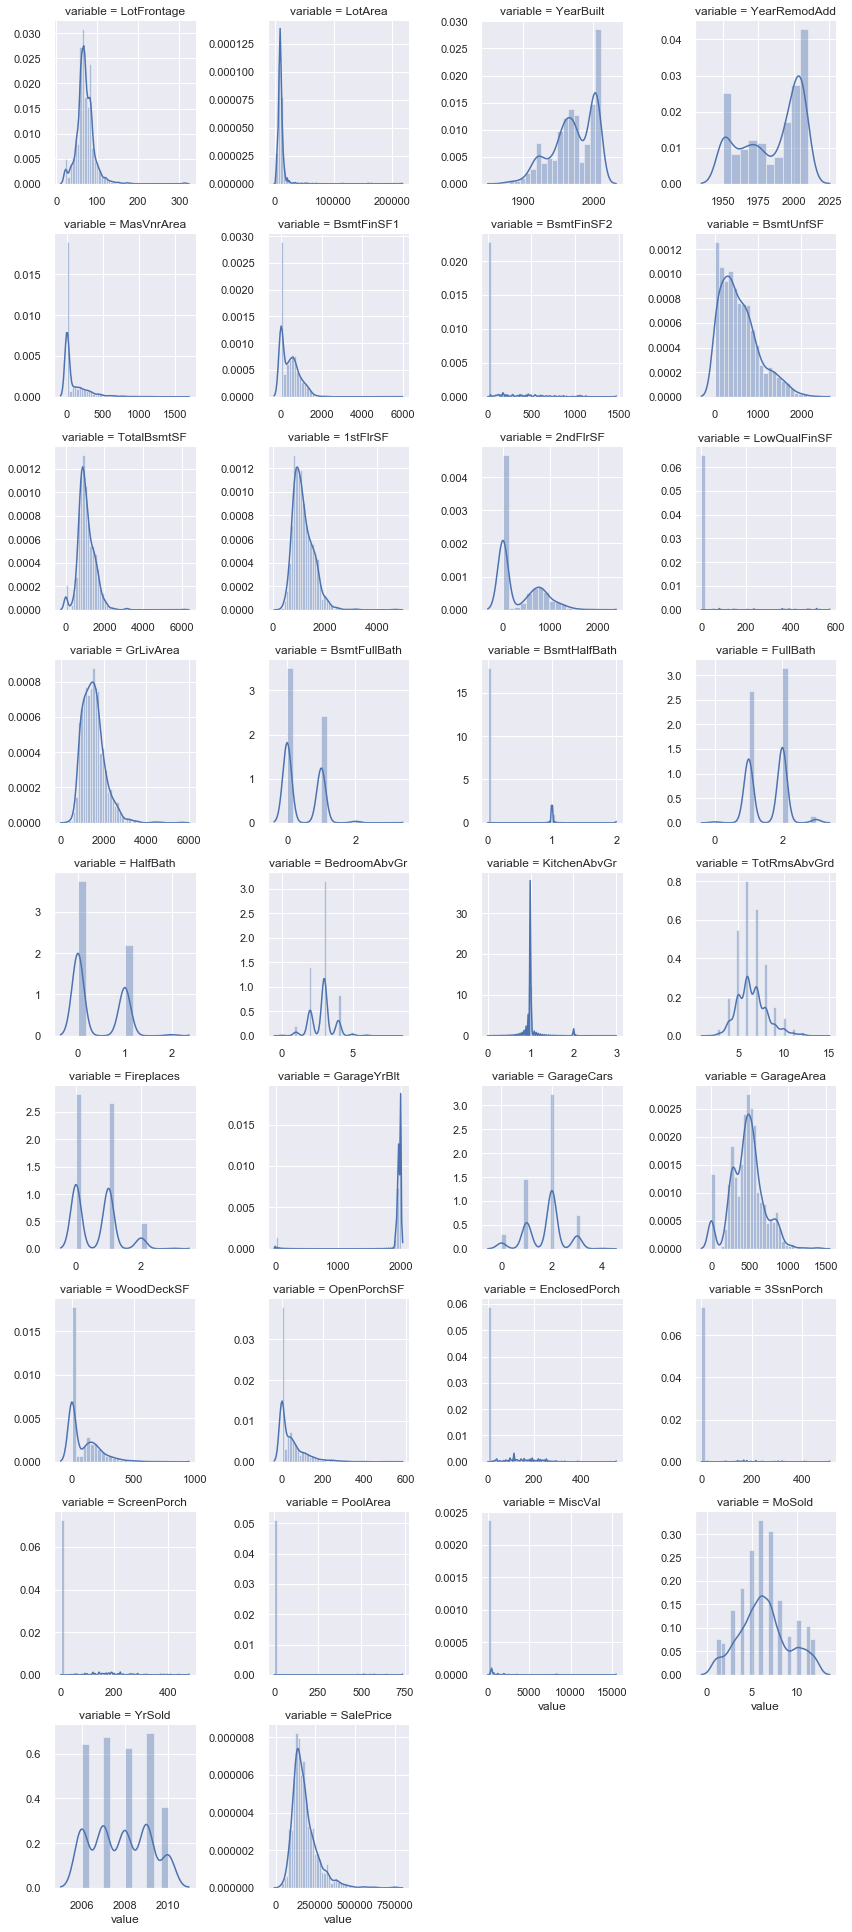

In [199]:
f = pd.melt(tr_data, value_vars=quant)
sns.set(font_scale = 1)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

The rest of quantitative data seems to be skewed. To transform later

Getting rid of outliers

In [200]:
tr_data = tr_data[tr_data.GrLivArea < 4500]
tr_data.reset_index(drop=True, inplace=True)
y_tr = tr_data['SalePrice'].reset_index(drop=True)


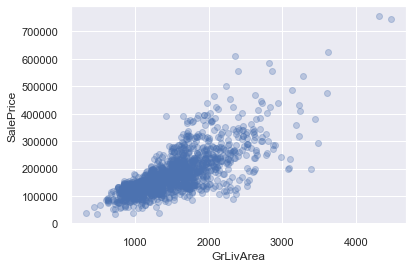

In [201]:
fig, ax = plt.subplots()
ax.scatter(x = tr_data['GrLivArea'], y = y_tr, alpha = 0.3)
plt.ylabel('SalePrice', fontsize = 12)
plt.xlabel('GrLivArea', fontsize = 12)
plt.show()

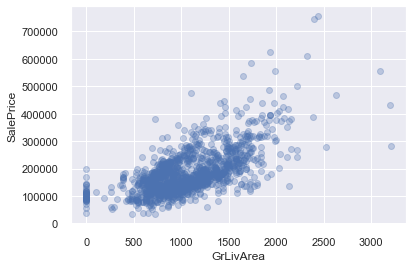

In [202]:
fig, ax = plt.subplots()
ax.scatter(x = tr_data['TotalBsmtSF'], y = y_tr, alpha = 0.3)
plt.ylabel('SalePrice', fontsize = 12)
plt.xlabel('GrLivArea', fontsize = 12)
plt.show()

## Qualitative data

In [203]:
print(qual)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'MSSubClass', 'OverallQual', 'OverallCond']


#### FILLING MISSING VALUES IN QUALITATIVE DATA

In [204]:
for i in qual:
    tr_data[i] = tr_data[i].astype('category')
    ts_data[i] = ts_data[i].astype('category')
    if tr_data[i].isnull().any():
        tr_data[i] = tr_data[i].cat.add_categories(['miss'])
        tr_data[i] = tr_data[i].fillna('miss')
    if ts_data[i].isnull().any():
        #ts_data[i] = ts_data[i].cat.add_categories(['miss'])
        ts_data[i] = ts_data[i].fillna('miss')

In [205]:
tr_data.isnull().sum().sum(), ts_data.isnull().sum().sum()

(0, 0)

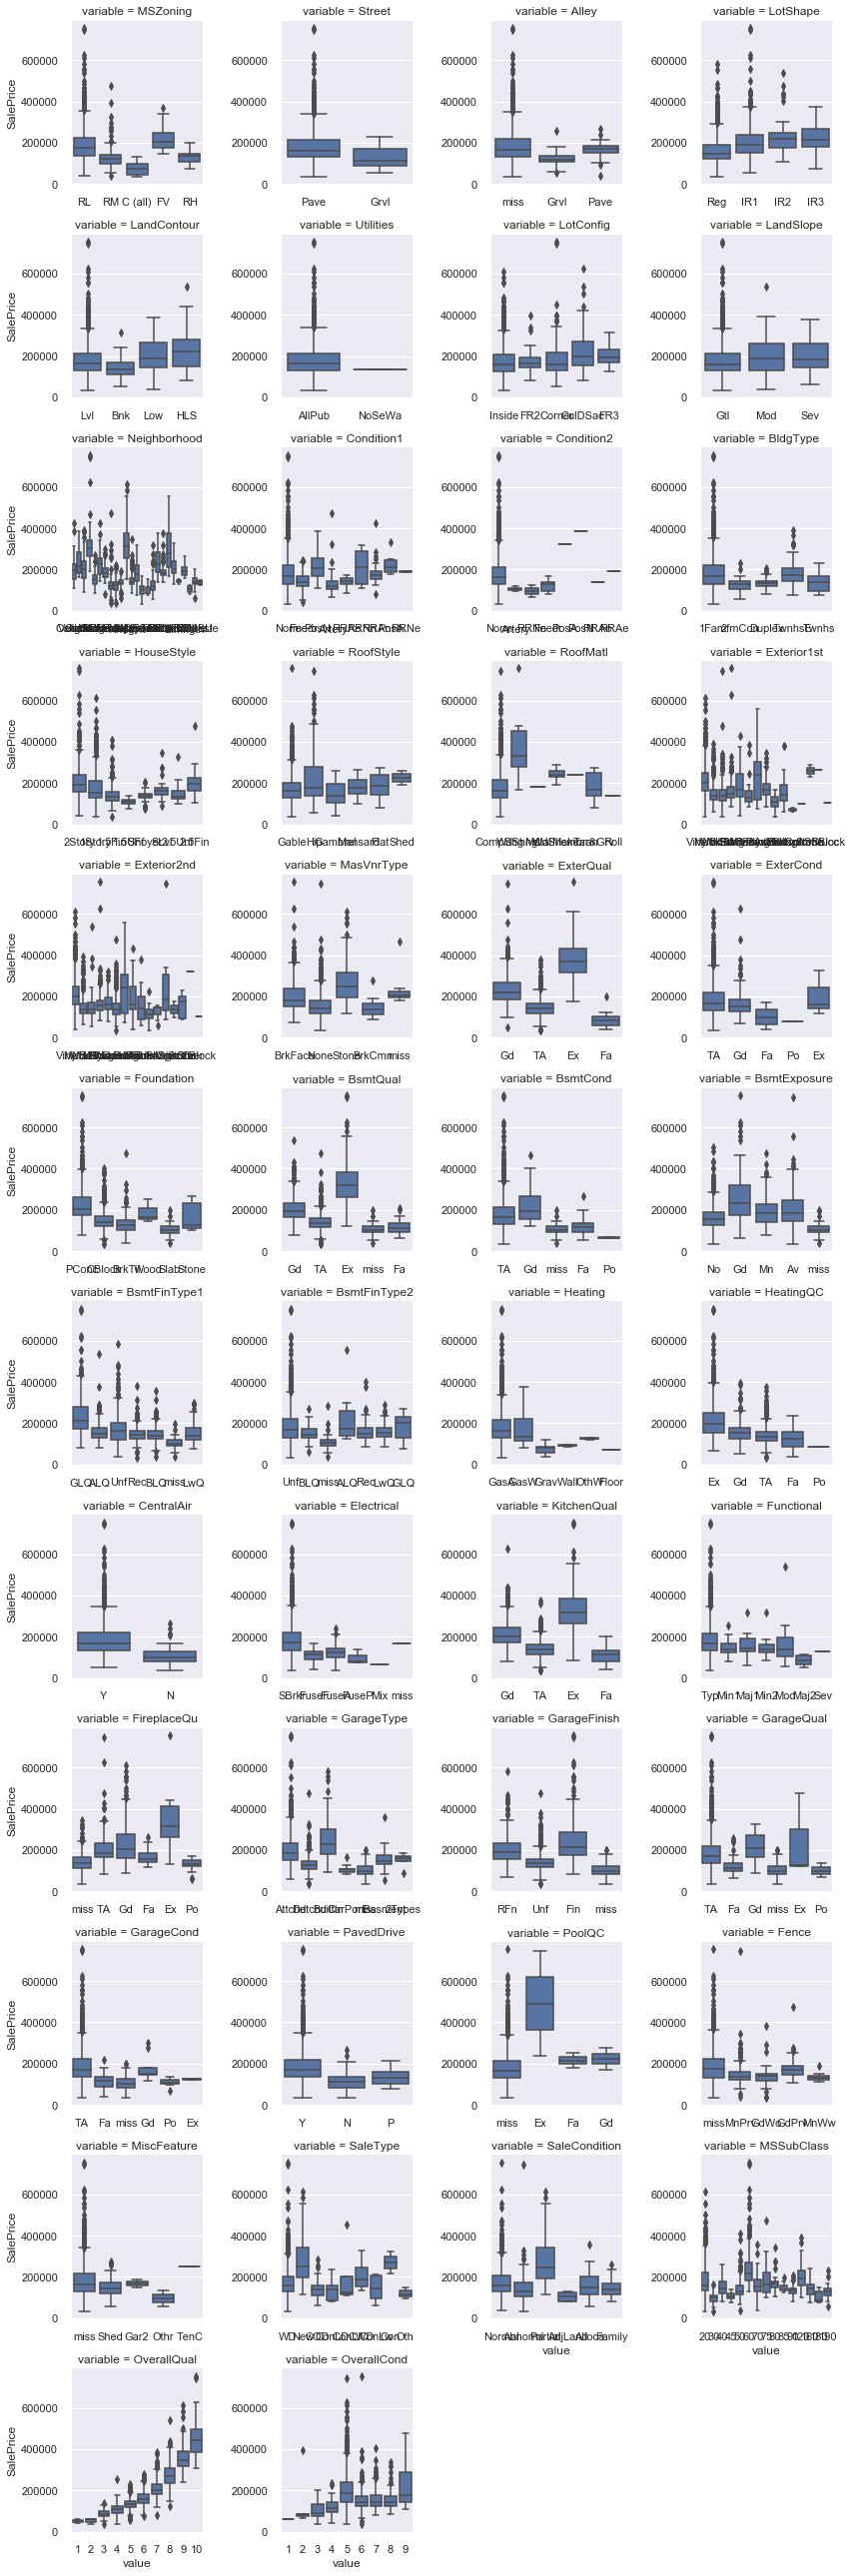

In [206]:
f = pd.melt(tr_data, id_vars = ['SalePrice'], value_vars=qual)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.boxplot, "value", 'SalePrice')

##### THE ANOVA COEF. (showing how strong feature has influence on SalePrice)

In [207]:
def anova(frame):
    anv = pd.DataFrame([])
    anv['feature'] = qual
    pvals = []
    for i in qual:
        samples = []
        for cls in frame[i].unique():
            s = frame[frame[i]==cls]['SalePrice'].values
            samples.append(s)
        pval = sts.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pvals'] = pvals
    return anv.sort_values('pvals')    

C:\Users\Mika\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


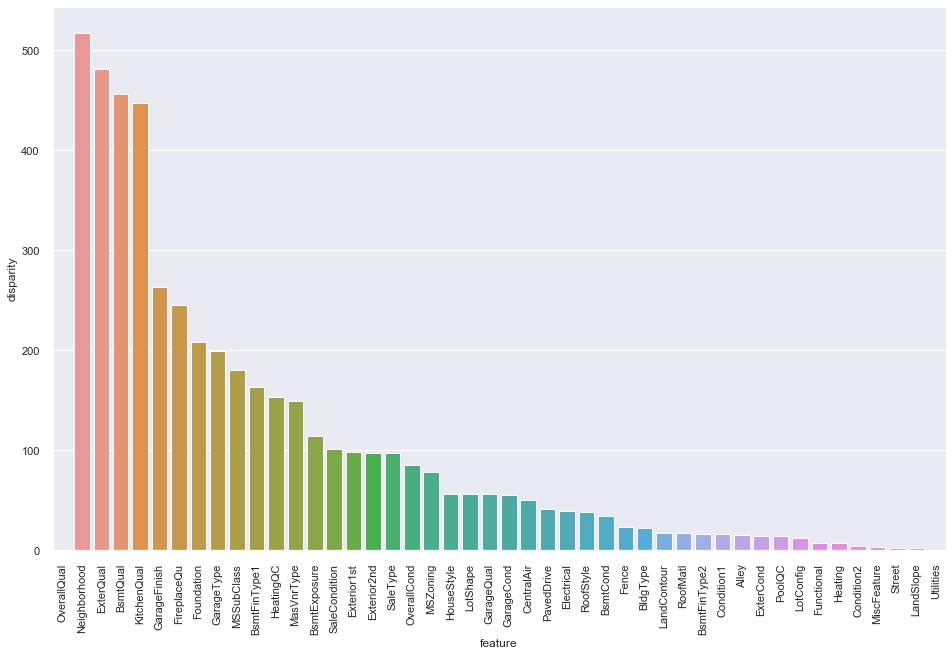

In [208]:
a = anova(tr_data)
a['disparity'] =np.log(1/a.pvals.values)
fig, ax = plt.subplots(figsize = (16,10))
sns.set(font_scale=2)
sns.barplot(data=a, x='feature',ax = ax,  y='disparity')
x=plt.xticks(rotation=90)

In [209]:
a['feature'].tail(5)

10     Condition2
40    MiscFeature
1          Street
7       LandSlope
5       Utilities
Name: feature, dtype: object

#### ENCODING

In [210]:
def encode(frame, feature):
    ordering = pd.DataFrame()
    ordering['val'] = frame[feature].unique()
    ordering.index = ordering.val
    ordering['spmean'] = frame[[feature, 'SalePrice']].groupby(feature).mean()
    ordering = ordering.sort_values('spmean')
    ordering['ordering'] = range(1, ordering.shape[0]+1)
    ordering = ordering['ordering'].to_dict()
    
    for cat, o in ordering.items():
        frame.loc[frame[feature] == cat, feature+'_enc'] = o

In [211]:
qual_enc = []
for i in qual:
    encode(tr_data, i)
    qual_enc.append(i+'_enc')
print (qual_enc)

['MSZoning_enc', 'Street_enc', 'Alley_enc', 'LotShape_enc', 'LandContour_enc', 'Utilities_enc', 'LotConfig_enc', 'LandSlope_enc', 'Neighborhood_enc', 'Condition1_enc', 'Condition2_enc', 'BldgType_enc', 'HouseStyle_enc', 'RoofStyle_enc', 'RoofMatl_enc', 'Exterior1st_enc', 'Exterior2nd_enc', 'MasVnrType_enc', 'ExterQual_enc', 'ExterCond_enc', 'Foundation_enc', 'BsmtQual_enc', 'BsmtCond_enc', 'BsmtExposure_enc', 'BsmtFinType1_enc', 'BsmtFinType2_enc', 'Heating_enc', 'HeatingQC_enc', 'CentralAir_enc', 'Electrical_enc', 'KitchenQual_enc', 'Functional_enc', 'FireplaceQu_enc', 'GarageType_enc', 'GarageFinish_enc', 'GarageQual_enc', 'GarageCond_enc', 'PavedDrive_enc', 'PoolQC_enc', 'Fence_enc', 'MiscFeature_enc', 'SaleType_enc', 'SaleCondition_enc', 'MSSubClass_enc', 'OverallQual_enc', 'OverallCond_enc']


## CORRELATIONS

In [212]:
features = quant + qual_enc
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['SalePrice'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize = (6, 0.25*len(features)))
    sns.set(font_scale=1)
    sns.barplot(data=spr, y= 'feature', x = 'spearman', orient = 'h')


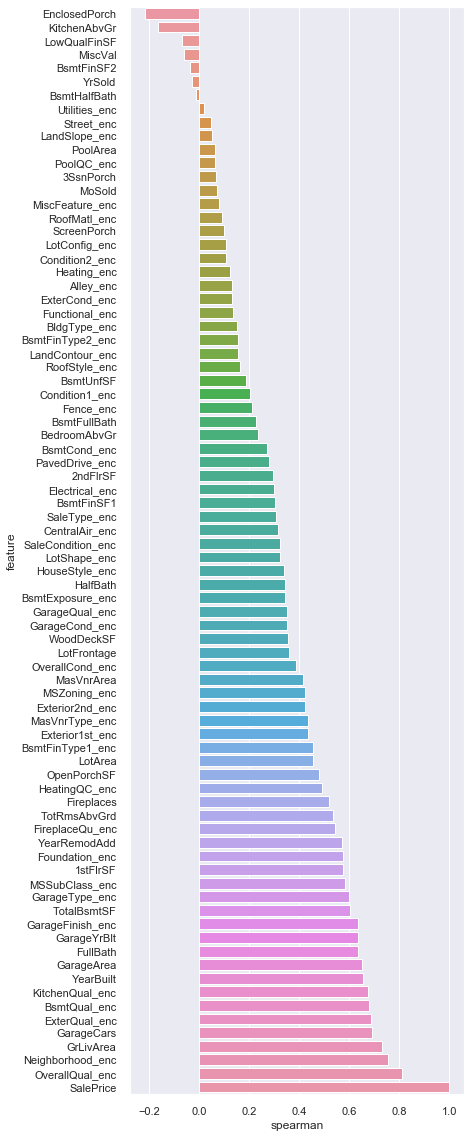

In [213]:
spearman(tr_data, features)

In [214]:
a['feature'].tail()

10     Condition2
40    MiscFeature
1          Street
7       LandSlope
5       Utilities
Name: feature, dtype: object

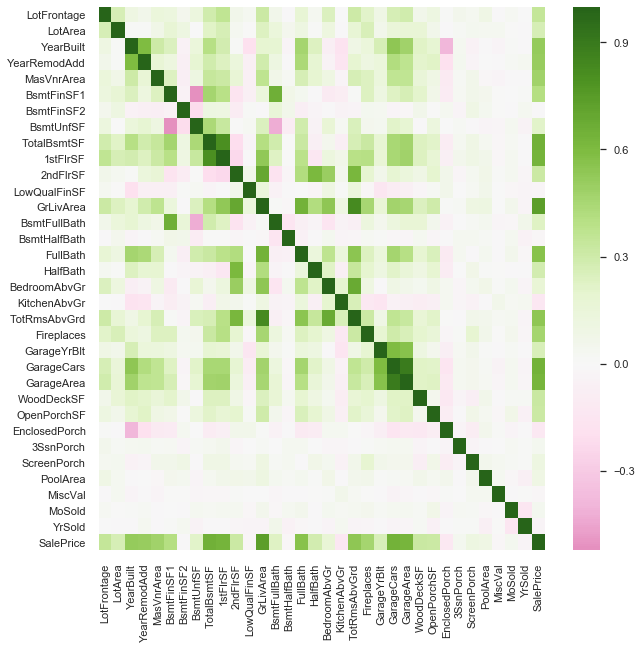

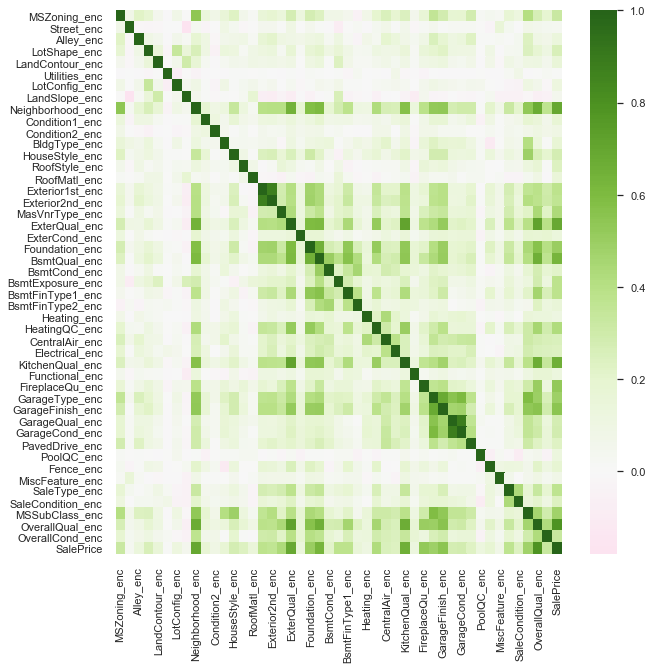

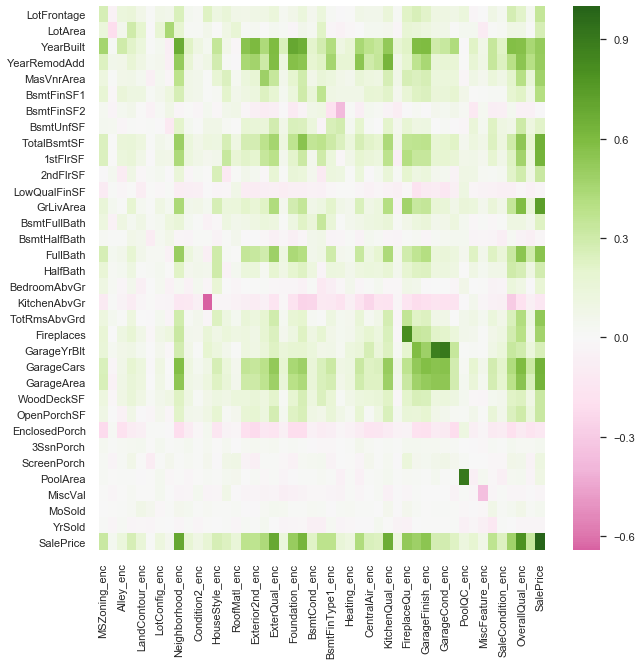

In [215]:
plt.figure(1, figsize = (10,10))
corr = tr_data[quant].corr()
sns.heatmap(corr, cmap="PiYG",center = 0.0);
plt.figure(2, figsize = (10,10))
corr = tr_data[qual_enc+['SalePrice']].corr()
sns.heatmap(corr,  cmap="PiYG", center = 0.0);
plt.figure(3, figsize = (10,10))
corr = pd.DataFrame(np.zeros([len(quant), len(qual_enc)+1]), index = quant, columns = qual_enc+['SalePrice'])
for f1 in quant:
    for f2 in qual_enc+['SalePrice']:
        corr.loc[f1,f2] = tr_data[f1].corr(tr_data[f2])
sns.heatmap(corr,  cmap="PiYG", center = 0.0);

In [216]:
quant.remove('SalePrice')

In [217]:
quant

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [283]:
train = tr_data[quant+qual].drop(columns = ['Street', 'LandSlope', 'Utilities'])
test = ts_data[quant+qual].drop(columns = ['Street', 'LandSlope', 'Utilities'])

skew = train[quant].apply(lambda x: sts.skew(x)).sort_values(ascending = False)
for i in skew[skew>0.3].index:
    train[i] = boxcox1p(train[i], sts.boxcox_normmax(train[i]+1))
    
skew = test[quant].apply(lambda x: sts.skew(x)).sort_values(ascending = False)
for i in skew[skew>0.3].index:
    test[i] = boxcox1p(test[i], sts.boxcox_normmax(test[i]+1))

print (train.shape, test.shape)
train_len = train.shape[0]
joined = train.append(test)
train = pd.get_dummies(joined)[:train_len]
test = pd.get_dummies(joined)[train_len:]
#train = pd.get_dummies(train)
#test = pd.get_dummies(test)
train.shape, test.shape

C:\Users\Mika\Anaconda3\lib\site-packages\scipy\stats\stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


(1458, 76) (1459, 76)


((1458, 334), (1459, 334))

In [284]:
train['TotalSF'] = train['1stFlrSF'] + train['2ndFlrSF'] + train['TotalBsmtSF']
train['YrRenov'] = train['YearBuilt'] + train['YearRemodAdd']
train['PorchSF'] = train['ScreenPorch'] + train['EnclosedPorch'] + train['OpenPorchSF']
train['BathSF'] = train['FullBath'] + (0.5*train['HalfBath']) + train['BsmtFullBath'] + (0.5*train['BsmtHalfBath'])


test['TotalSF'] = test['1stFlrSF'] + test['2ndFlrSF'] + test['TotalBsmtSF']
test['YrRenov'] = test['YearBuilt'] + test['YearRemodAdd']
test['PorchSF'] = test['ScreenPorch'] + test['EnclosedPorch'] + test['OpenPorchSF']
test['BathSF'] = test['FullBath'] + (0.5*test['HalfBath']) + test['BsmtFullBath'] + (0.5*test['BsmtHalfBath'])


train['hasPool'] = train['PoolArea'].apply(lambda x: 1 if x>0 else 0)
train['hasGarage'] = train['GarageArea'].apply(lambda x: 1 if x>0 else 0)
train['hasBsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
train['hasFireplace'] = train['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

test['hasPool'] = test['PoolArea'].apply(lambda x: 1 if x>0 else 0)
test['hasGarage'] = test['GarageArea'].apply(lambda x: 1 if x>0 else 0)
test['hasBsmt'] = test['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
test['hasFireplace'] = test['Fireplaces'].apply(lambda x: 1 if x>0 else 0)

In [220]:
def johnson_to_norm(x):
    gamma, eta, epsilon, lbda = sts.johnsonsu.fit(x)
    x_norm = gamma + eta*np.arcsinh((x-epsilon)/lbda)
    return x_norm, gamma, eta, epsilon, lbda
def norm_to_johnson(x_norm, gamma, eta, epsilon, lbda):
    return lbda*np.sinh((x_norm - gamma)/eta)+epsilon

In [221]:
y_tr_johns, g, et, ep, l = johnson_to_norm(tr_data['SalePrice'])
y_tr_johns_inv = norm_to_johnson(y_tr_johns, g, et, ep, l)

In [222]:
y_tr_log = np.log1p(tr_data['SalePrice'])
y_tr = tr_data['SalePrice']
y_tr_boxcox = boxcox1p(y_tr, sts.boxcox_normmax(y_tr))

In [223]:
print ('log {}'.format(sts.skew(y_tr_log)))
print ('johns {}'.format(sts.skew(y_tr_johns)))
print ('boxcox {}'.format(sts.skew(y_tr_boxcox)))
print ('base {}'.format(sts.skew(y_tr)))

log 0.1214546426818453
johns -0.0019445983752937746
boxcox 0.0295122075366227
base 1.8793604459195012


In [224]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingCVRegressor

# training
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [225]:
n_folds = 10
kf = KFold(n_folds, shuffle = True, random_state = 42)

def rmse_cv(model, train_res):
    rmse = np.sqrt(-cross_val_score(model, train.values, train_res, scoring = 'neg_mean_squared_error', cv = kf))
    return (rmse)
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [226]:
alphas = [0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]
alphas_r = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
el1 = [i/20 for i in range(12,21)]

In [227]:
el1

[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

In [228]:
LASSO = make_pipeline(RobustScaler(), LassoCV(max_iter = 1e7, alphas = alphas, random_state = 1, cv = kf))
RIDGE = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_r, cv = kf))
ELASTICNET = make_pipeline(RobustScaler(), ElasticNetCV(alphas = alphas, cv = kf, l1_ratio = el1))
SVR_ = make_pipeline(RobustScaler(), SVR(C = 10, epsilon = 0.01, gamma = 0.0001))
RFR = RandomForestRegressor(min_samples_split = 10, max_depth = 1000, random_state = 42)
GBR = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.05, min_samples_split = 10, loss = 'huber', random_state = 42)
DTR = DecisionTreeRegressor(min_samples_split = 20, max_depth = 1500, random_state = 42)

XGB = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:squarederror', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006)

LGBM = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

#stack_gen = StackingCVRegressor(regressors=(LASSO, RIDGE, ELASTICNET, SVR_, GBR, XGB, LGBM),
 #                               meta_regressor=XGB,
 #                               use_features_in_secondary=True)

In [168]:
Lasso_rmse = rmse_cv(LASSO, y_tr_log)
print ('LASSO score {}, std {}'.format(Lasso_rmse.mean(), Lasso_rmse.std()))
Ridge_rmse = rmse_cv(RIDGE, y_tr_log)
print ('RIDGE score {}, std {}'.format(Ridge_rmse.mean(), Ridge_rmse.std()))
Elastic_rmse = rmse_cv(ELASTICNET, y_tr_log)
print ('ELASTICNET score {}, std {}'.format(Elastic_rmse.mean(), Elastic_rmse.std()))
Svr_rmse = rmse_cv(SVR_, y_tr_log)
print ('SVR_ score {}, std {}'.format(Svr_rmse.mean(), Svr_rmse.std()))
Rfr_rmse = rmse_cv(RFR, y_tr_log)
print ('RFR score {}, std {}'.format(Rfr_rmse.mean(), Rfr_rmse.std()))
Gbr_rmse = rmse_cv(GBR, y_tr_log)
print ('GBR score {}, std {}'.format(Gbr_rmse.mean(), Gbr_rmse.std()))
Gbr_rmse = rmse_cv(DTR, y_tr_log)
print ('DTR score {}, std {}'.format(Gbr_rmse.mean(), Gbr_rmse.std()))

LASSO score 0.1088763965157176, std 0.016693378971128374
RIDGE score 0.11128425385011317, std 0.016567301408294065
ELASTICNET score 0.10924710351221747, std 0.01635226425820751
SVR_ score 0.12071663662171114, std 0.018819306991098805
RFR score 0.1479958587582329, std 0.01315381857873605
GBR score 0.11787600655964336, std 0.014310451153451297
DTR score 0.1915908980979866, std 0.01109431117659132


NEW FEATURES, TEST_TRANSFORM

In [170]:
Xgb_rmse = rmse_cv(XGB, y_tr_log)
print ('XGB score {}, std {}'.format(Xgb_rmse.mean(), Xgb_rmse.std()))
Lgbm_rmse = rmse_cv(LGBM, y_tr_log)
print ('LGBM score {}, std {}'.format(Lgbm_rmse.mean(), Lgbm_rmse.std()))
#Stack_gen_rmse = rmse_cv(stack_gen, y_tr_log)
#print ('STACK_GEN score {}, std {}'.format(Stack_gen_rmse.mean(), Stack_gen_rmse.std()))

XGB score 0.11398579195053989, std 0.01583243971239765
LGBM score 0.11748057491786543, std 0.016658997559102412


KeyboardInterrupt: 

In [285]:
X = train
y = y_tr_log
LASSO_FULL = LASSO.fit(X, y)
RIDGE_FULL = RIDGE.fit(X, y)
ELASTICNET_FULL = ELASTICNET.fit(X, y)
SVR__FULL = SVR_.fit(X, y)
RFR_FULL = RFR.fit(X, y)
GBR_FULL = GBR.fit(X, y)
DTR_FULL = DTR.fit(X, y)
XGB_FULL = XGB.fit(X, y)
LGBM_FULL = LGBM.fit(X, y)
#STACK_GEN_FULL = stack_gen.fit(X, y)

In [229]:


def blend_predict (X):
    return ((0.15*LASSO_FULL.predict(X)+\
             0.1*RIDGE_FULL.predict(X)+\
             0.1*ELASTICNET_FULL.predict(X)+\
             0.1*SVR__FULL.predict(X)+\
             0.1*RFR_FULL.predict(X)+\
             0.15*GBR_FULL.predict(X)+\
             0.1*DTR_FULL.predict(X)+\
             0.1*XGB_FULL.predict(X)+\
             0.1*LGBM_FULL.predict(X)))
            



print ("BLEND SCORE {}".format(rmsle(y, blend_predict(X))))
print ("LASOO SCORE {}".format(rmsle(y, LASSO_FULL.predict(X))))
print ("RIDGE SCORE {}".format(rmsle(y, RIDGE_FULL.predict(X))))
print ("ELASTICNET SCORE {}".format(rmsle(y, ELASTICNET_FULL.predict(X))))
print ("SVR_ SCORE {}".format(rmsle(y, SVR_.predict(X))))
print ("RFR SCORE {}".format(rmsle(y, RFR.predict(X))))
print ("GBR SCORE {}".format(rmsle(y, GBR.predict(X))))
print ("DTR SCORE {}".format(rmsle(y, DTR.predict(X))))
print ("XGB SCORE {}".format(rmsle(y, XGB.predict(X))))
print ("LGBM SCORE {}".format(rmsle(y, LGBM.predict(X))))
#print ("STACK_GEN SCORE {}".format(rmsle(y, stack_gen.predict(X))))

BLEND SCORE 0.06981434904783357
LASOO SCORE 0.09743551099106441
RIDGE SCORE 0.0961587911424725
ELASTICNET SCORE 0.0967461562839974
SVR_ SCORE 0.1117470876143184
RFR SCORE 0.08035327854958868
GBR SCORE 0.054829041089827404
DTR SCORE 0.09560295370306596
XGB SCORE 0.05026438305311368
LGBM SCORE 0.07760091699013108


In [289]:
def blend_predict (X):
    return ((0.03*LASSO_FULL.predict(X)+\
             0.03*RIDGE_FULL.predict(X)+\
             0.03*ELASTICNET_FULL.predict(X)+\
             0*SVR__FULL.predict(X)+\
             0.18*RFR_FULL.predict(X)+\
             0.22*GBR_FULL.predict(X)+\
             0.05*DTR_FULL.predict(X)+\
             0.27*XGB_FULL.predict(X)+\
             0.17*LGBM_FULL.predict(X)))
            



print ("BLEND SCORE {}".format(rmsle(y, blend_predict(X))))

BLEND SCORE 0.0569573222345715


In [290]:
result = np.array(np.expm1(blend_predict(test))); result

array([123742.80549683, 141469.73278358, 169565.99430314, ...,
       151910.33850788, 114655.25749365, 189091.60448948])

In [291]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(result)
submission = submission.set_index('Id')

In [292]:
submission.to_csv('HousePrices_log_subm.csv')

In [280]:
X = train
y = y_tr_johns
LASSO_FULL = LASSO.fit(X, y)
RIDGE_FULL = RIDGE.fit(X, y)
ELASTICNET_FULL = ELASTICNET.fit(X, y)
SVR__FULL = SVR_.fit(X, y)
RFR_FULL = RFR.fit(X, y)
GBR_FULL = GBR.fit(X, y)
DTR_FULL = DTR.fit(X, y)
XGB_FULL = XGB.fit(X, y)
LGBM_FULL = LGBM.fit(X, y)
#STACK_GEN_FULL = stack_gen.fit(X, y)

In [281]:
def blend_predict (X):
    return ((0.03*LASSO_FULL.predict(X)+\
             0.03*RIDGE_FULL.predict(X)+\
             0.03*ELASTICNET_FULL.predict(X)+\
             0*SVR__FULL.predict(X)+\
             0.18*RFR_FULL.predict(X)+\
             0.24*GBR_FULL.predict(X)+\
             0.05*DTR_FULL.predict(X)+\
             0.27*XGB_FULL.predict(X)+\
             0.17*LGBM_FULL.predict(X)))
            
print ("BLEND SCORE {}".format(rmsle(y, blend_predict(X))))

BLEND SCORE 0.14342165498303666


In [282]:
result = np.array(norm_to_johnson(blend_predict(test), g, et, ep, l)); result

array([244050.00006136, 312730.44698877, 339699.10381344, ...,
       336058.3290231 , 227570.75737642, 375119.53743506])

In [88]:
submission = pd.read_csv("sample_submission.csv")
submission.iloc[:,1] = np.floor(result)
submission = submission.set_index('Id')
submission.to_csv('HousePrices_boxcox_subm.csv')